['[-1, -1, 0, 1, 18]', '[-1, -1, 0, 1, 27]', '[-1, -1, 0, 1, 28]', '[-1, -1, 0, 1, 6]', '[-1, -1, 0, 1, 8]', '[-1, -1, 0, 1, 9]', '[-1, -1, 0, 10, 15]', '[-1, -1, 0, 10, 17]', '[-1, -1, 0, 10, 18]', '[-1, -1, 0, 10, 23]', '[-1, -1, 0, 10, 24]', '[-1, -1, 0, 10, 26]', '[-1, -1, 0, 10, 27]', '[-1, -1, 0, 10, 28]', '[-1, -1, 0, 10, 30]', '[-1, -1, 0, 10, 36]', '[-1, -1, 0, 10, 5]', '[-1, -1, 0, 10, 6]', '[-1, -1, 0, 10, 8]', '[-1, -1, 0, 10, 9]', '[-1, -1, 0, 13, 11]', '[-1, -1, 0, 13, 18]', '[-1, -1, 0, 13, 26]', '[-1, -1, 0, 13, 27]', '[-1, -1, 0, 13, 28]', '[-1, -1, 0, 13, 30]', '[-1, -1, 0, 13, 8]', '[-1, -1, 0, 13, 9]', '[-1, -1, 0, 14, 27]', '[-1, -1, 0, 14, 28]', '[-1, -1, 0, 14, 9]', '[-1, -1, 0, 19, 18]', '[-1, -1, 0, 19, 24]', '[-1, -1, 0, 19, 26]', '[-1, -1, 0, 19, 27]', '[-1, -1, 0, 19, 28]', '[-1, -1, 0, 19, 30]', '[-1, -1, 0, 19, 36]', '[-1, -1, 0, 19, 9]', '[-1, -1, 0, 2, 9]', '[-1, -1, 0, 20, 27]', '[-1, -1, 0, 20, 28]', '[-1, -1, 0, 22, 27]', '[-1, -1, 0, 22, 28]', '[-1, 

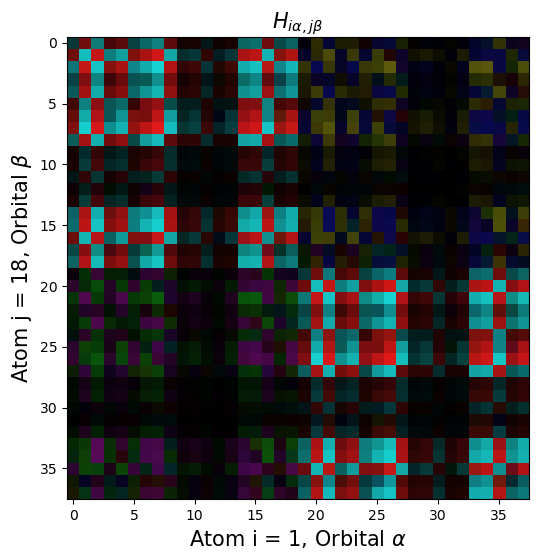

Processing dataset: [-1, -1, 0, 1, 27]
(38, 38)


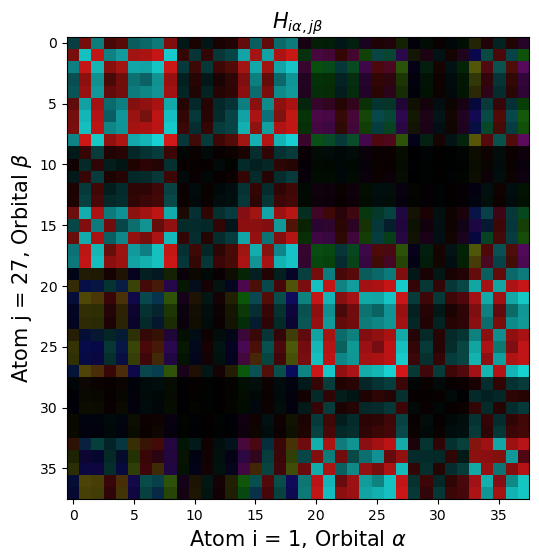

In [7]:
import h5py
import numpy as np 
import torch
import matplotlib.pyplot as plt
from colorsys import hls_to_rgb
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Function to convert complex numbers to RGB colors
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # --> array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c
    
def parse_key_string(key_string):
    # Remove the brackets and split the string by commas
    key_list = key_string.strip('[]').split(', ')
    # Convert the string elements to integers
    key_list = [int(x) for x in key_list]
    # Extract R, i, j
    R = key_list[:3]
    i = key_list[3]
    j = key_list[4]
    return R, i, j

file_path = '../example2/work_dir/dataset/processed/0/hamiltonians.h5'
file_path = './example2/processed/hamiltonians.h5'
with h5py.File(file_path, 'r') as h5file:
    # List all groups and datasets in the file
    list_keys = list(h5file.keys())
    print((list_keys))
    # Iterate over the first two datasets (or you can change to iterate over all keys)
    for i in range(2):
        selected_key = list_keys[i]  # Change this to iterate over list_keys if desired
        print(f"Processing dataset: {selected_key}")
        R, I, J = parse_key_string(selected_key)
        # Read the dataset
        data = h5file[selected_key][:]
        print(data.shape)
        # Convert the complex data to an RGB image
        img = colorize(data)
        plt.figure(figsize=(8, 6))
        # Plot the image
        plt.imshow(img)
        plt.xlabel('Atom i = {}, Orbital $\\alpha$'.format(I),fontsize=15)
        plt.ylabel('Atom j = {}, Orbital $\\beta$'.format(J),fontsize=15)   
        plt.title('$H_{i\\alpha, j\\beta}$',fontsize=15)
        # Display the plot
        plt.show()


## Ensure Hermitian of the Hamiltonian
The "Hamiltonian.h5" is storaged as the following: keys = [-1, -1, 0, 1, 18] the data correspond to the keys will be the Hamiltonian matrix for that. Therefore, the Hermitian 


(38, 38)


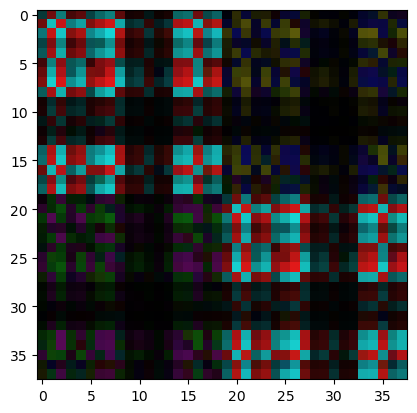

(38, 38)


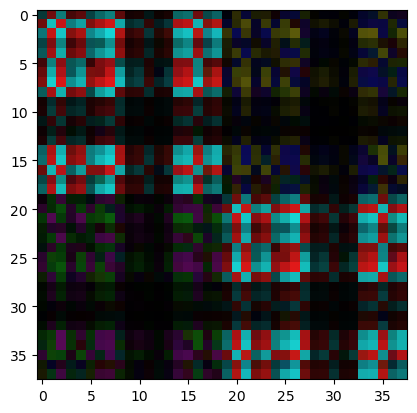

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 ...

 [[ 0.00000000e+00  0.00000000e+00

In [4]:
with h5py.File(file_path, 'r') as h5file:
    selected_key = '[-1, -1, 0, 1, 18]'
    data = h5file[selected_key][:]
    print(data.shape)
    img = colorize(data)
    plt.imshow(img)
    plt.show()
    selected_key = '[1, 1, 0, 18, 1]'
    data = h5file[selected_key][:]
    print(data.shape)
    img2 = colorize(np.conjugate(data.T))
    plt.imshow(img2)
    plt.show()

    print(img-img2)

In [53]:
with h5py.File('./example2/processed/rh.h5', 'r') as h5file:
    for i in range(5):
        selected_key = list(h5file.keys())[i]
        data = h5file[selected_key][:]
        print(data.shape)

        


(38, 38)
(38, 38)
(38, 38)
(38, 38)
(38, 38)


In [6]:
with h5py.File('./example2/processed/rc.h5', 'r') as h5file:
    for i in range(5):
        selected_key = list(h5file.keys())[i]
        data = h5file[selected_key][:]
        print(data.shape)

        


(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
